# Python Filter Test
- Band Pass Filter Process
- Block Process
- Overlap add Process
- FIR Filter Process Test



In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time
import math
import platform

# Import Audio
import wave
import pyaudio
import librosa

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt
import soundfile

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg
import pyOssFilter



In [2]:
# .wav File Open

# Impulse Data Load --------------------------------------------------------

impulse_dir = os.path.join(os.getcwd(), 'impulsefiles')     # Path of audiofiles folder

# IMPULSE WAVE FILE
#wav_fname_impulse = "TyndallBruceMonument.wav"
#wav_fname_impulse = "ElvedenHallMarbleHall.wav'"
#wav_fname_impulse = "EmptyApartmentBedroom.wav"
#wav_fname_impulse = "FalklandPalaceRoyalTennisCourt.wav"
#wav_fname_impulse = "InsidePiano.wav"
wav_fname_impulse = "MaesHowe.wav"
#wav_fname_impulse = "SportsCentreUniversityOfYork.wav"
#wav_fname_impulse = "StairwayUniversityOfYork.wav"
#wav_fname_impulse = "StAndrewsChurch.wav"
#wav_fname_impulse = "mh3_000_ortf_48k.wav"

impulse_fname = os.path.join(impulse_dir, wav_fname_impulse)

impulse_fmt_chunk = pyOssWavfile.read_format(impulse_fname)
impulse_struct_fmt = pyOssWavfile.extractWavFmtChunk(impulse_fmt_chunk)

if impulse_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    impulse_data, impulse_struct_fmt.fs = soundfile.read(impulse_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    impulse_fmt_chunk, impulse_data, impulse_length = pyOssWavfile.read(impulse_fname)

impulse_time = impulse_data.shape[0] / impulse_struct_fmt.fs

# AUDIO Data Load------
audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# TEST AUDIO WAVE FILE
wav_fname_audio = "adult_female_speech.wav"
#wav_fname_audio = "bagpipe_music.wav"
#wav_fname_audio = "bagpipe_steady_chord.wav"
#wav_fname_audio = "flute_arpeggio.wav"
#wav_fname_audio = "flute_music.wav"
#wav_fname_audio = "tuba_arpeggio.wav"
#wav_fname_audio = "tuba_music.wav"

audio_fname = os.path.join(audio_dir, wav_fname_audio)

audio_fmt_chunk = pyOssWavfile.read_format(audio_fname)
audio_struct_fmt = pyOssWavfile.extractWavFmtChunk(audio_fmt_chunk)

if audio_struct_fmt.bitdepth == 24:        # Bitdepth가 24bit일 때는 pysoundfile을 이용하여 wav data를 불러옴
    audio_data, audio_struct_fmt.fs = soundfile.read(audio_fname)
else:                                       # 그 외에는 scipy.io.wavfile을 수정한 함수 pyOssWavfile을 이용하여 wav data를 불러옴
    audio_fmt_chunk, audio_data, audio_length = pyOssWavfile.read(audio_fname)

audio_time = audio_data.shape[0] / audio_struct_fmt.fs



176 353
0.01600907029478458


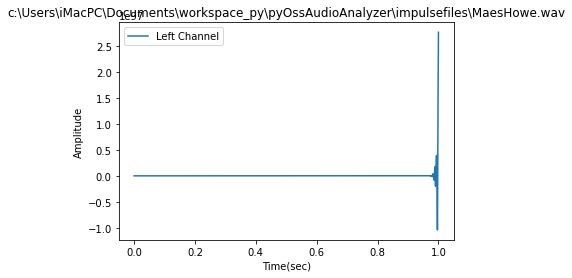

353 707
0.032063492063492065


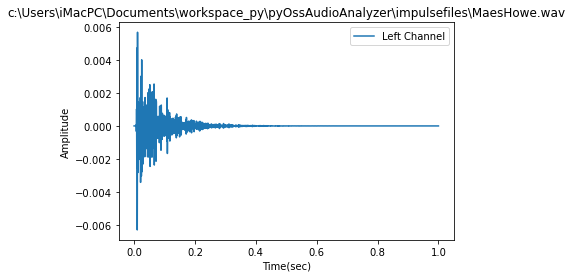

707 1414
0.06412698412698413


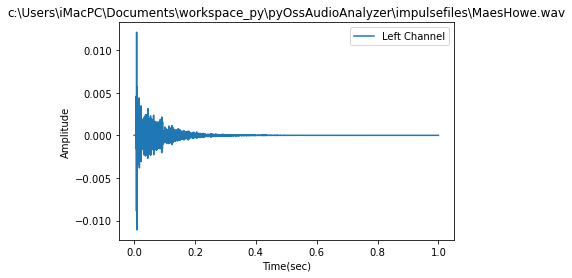

1414 2828
0.12825396825396826


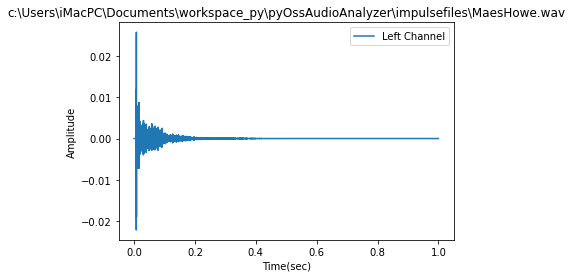

2828 5656
0.2565079365079365


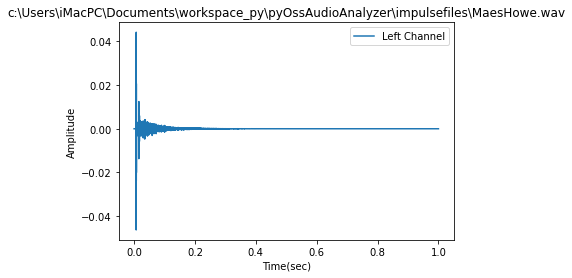

5656 11312
0.513015873015873


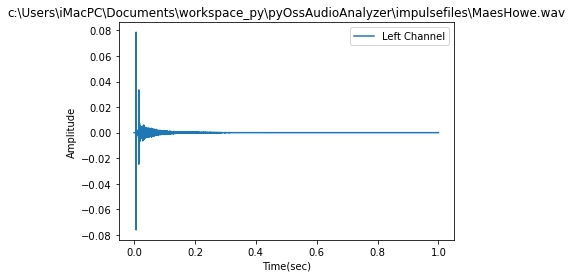

11312 22624
0.99


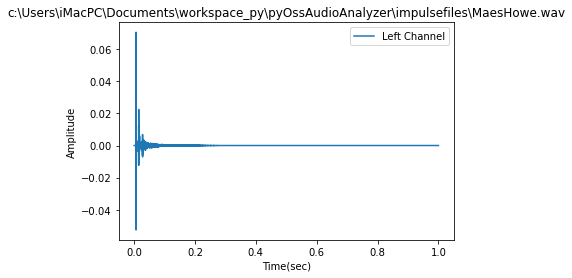

176 353
0.01600907029478458


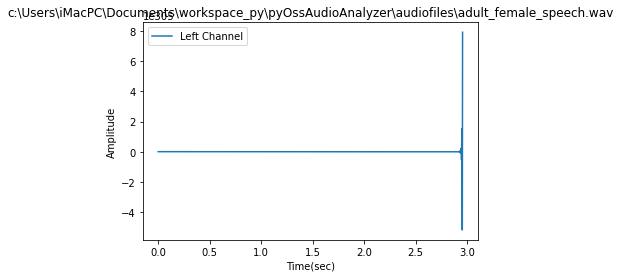

353 707
0.032063492063492065


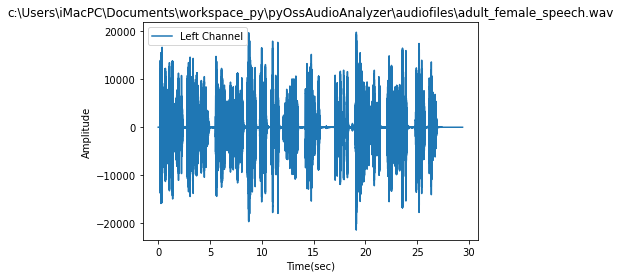

707 1414
0.06412698412698413


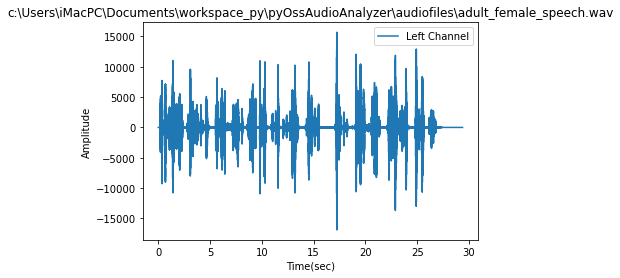

1414 2828
0.12825396825396826


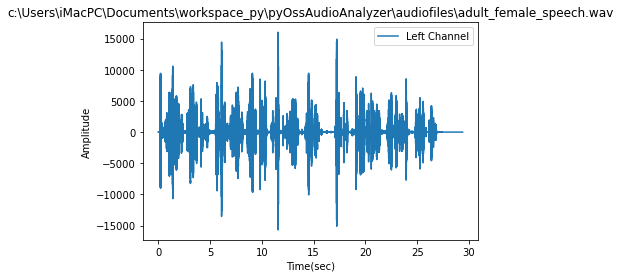

2828 5656
0.2565079365079365


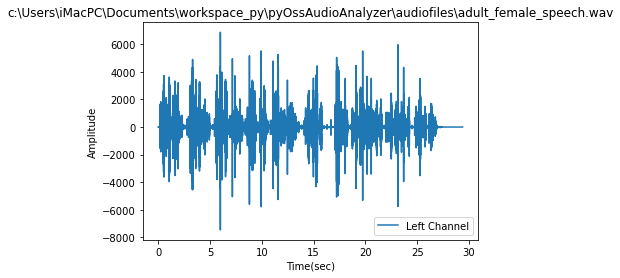

5656 11312
0.513015873015873


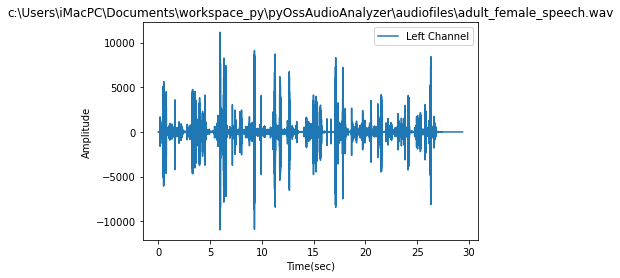

11312 22624
0.99


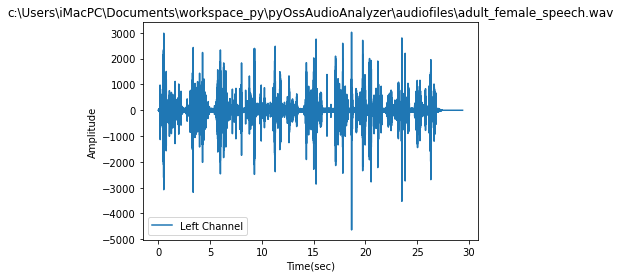

In [5]:
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]
num = 0
impulse_data_filtered = np.array

for fc in array_fc:
    band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
    impulse_data_filtered = pyOssFilter.bandpass_filter(impulse_data[:,0], band_f1, band_f2, impulse_struct_fmt.fs, order=5)
    dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data_filtered, impulse_fname, "Left Channel", "Time(sec)", "Amplitude")
    num = num + 1

for fc in array_fc:
    band_f1, band_f2 = pyOssFilter.bp_cf_to_band_range(fc)
    audio_data_filtered = pyOssFilter.bandpass_filter(audio_data[:,0], band_f1, band_f2, audio_struct_fmt.fs, order=5)
    dbg.dPlotAudio(audio_struct_fmt.fs, audio_data_filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")
    num = num + 1


In [ ]:
# FIR Filter Test
array_fc = [250, 500, 1000, 2000, 4000, 8000, 16000]

# FIR Bandpass Fitler Design
firtab = 128
coef_fir1 = sig.firwin(firtab)
coef_fir2 = sig.firwin2(firtab)

print (ossWav_data)

for fc in array_fc:
    oss_f1, oss_f2 = pyOssFilter.bp_cf_to_band_range(fc)

print (oss_f1, oss_f2)
ossWav_data_fir_filtered = sig.firwin(firtab, [oss_f1, oss_f2], ossWav_data[:,0], oss_f1, oss_f2, ossWav_struct_fmt.fs, order=5)
dbg.dPlotAudio(ossWav_struct_fmt.fs, ossWav_data_filtered, audio_fname, "Left Channel", "Time(sec)", "Amplitude")


In [ ]:
# FFT Test

In [ ]:
CHUNK = 1024
BUFFER = CHUNK * 4




